# Demo of iRF regression

* The following is a demo of the scikit learn iRF code

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split
import numpy as np
from functools import reduce

# Needed for the scikit-learn wrapper function
from irf import irf_utils
from irf.ensemble import RandomForestRegressor
from math import ceil

# Import our custom utilities
from imp import reload
from irf import irf_jupyter_utils
reload(irf_jupyter_utils)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<module 'irf.irf_jupyter_utils' from '/home/ubuntu/github/irf/irf/irf_jupyter_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestRegressor

In [2]:
from sklearn.model_selection import train_test_split
raw_data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    raw_data.data, raw_data.target, train_size=0.5,
    random_state=2018)

# Just fit a simple random forest classifier with 2 decision trees
rf = RandomForestRegressor(
    n_estimators=20, random_state=2019)

# fit the classifier
rf.fit(X=X_train, y=y_train)

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=2019, verbose=0, warm_start=False)

## Check out the data

In [3]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 2 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 2 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(253, 13)


Training outcome dimensions:
(253,)


Test feature dimensions:
(253, 13)


Test outcome dimensions:
(253,)


first 2 rows of the training set features:
[[1.7780e-02 9.5000e+01 1.4700e+00 0.0000e+00 4.0300e-01 7.1350e+00
  1.3900e+01 7.6534e+00 3.0000e+00 4.0200e+02 1.7000e+01 3.8430e+02
  4.4500e+00]
 [2.9090e-01 0.0000e+00 2.1890e+01 0.0000e+00 6.2400e-01 6.1740e+00
  9.3600e+01 1.6119e+00 4.0000e+00 4.3700e+02 2.1200e+01 3.8808e+02
  2.4160e+01]]


first 2 rows of the training set outcomes:
[32.9 14. ]


## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [4]:
all_rf_tree_data = irf_utils.get_rf_tree_data(
    rf=rf, X_train=X_train, X_test=X_test, y_test=y_test)

## STEP 3: Get the RIT data and produce RITs

In [5]:
np.random.seed(12)
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=None,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 0.00046399 0.00044853 ... 0.00012373 0.00012373 0.00010827]
1.0
[0.00049493 

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [6]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 12 (0.548507)
2. feature 5 (0.253695)
3. feature 7 (0.044783)
4. feature 0 (0.043400)
5. feature 4 (0.041353)
6. feature 10 (0.011835)
7. feature 6 (0.011417)
8. feature 2 (0.011065)
9. feature 11 (0.010984)
10. feature 9 (0.010416)
11. feature 3 (0.008188)
12. feature 8 (0.003720)
13. feature 1 (0.000638)


### Plot Ranked Feature Importances

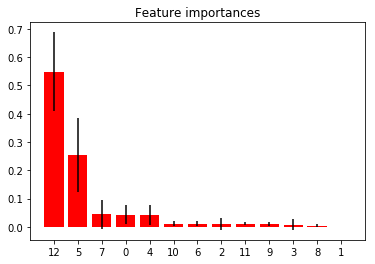

In [7]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

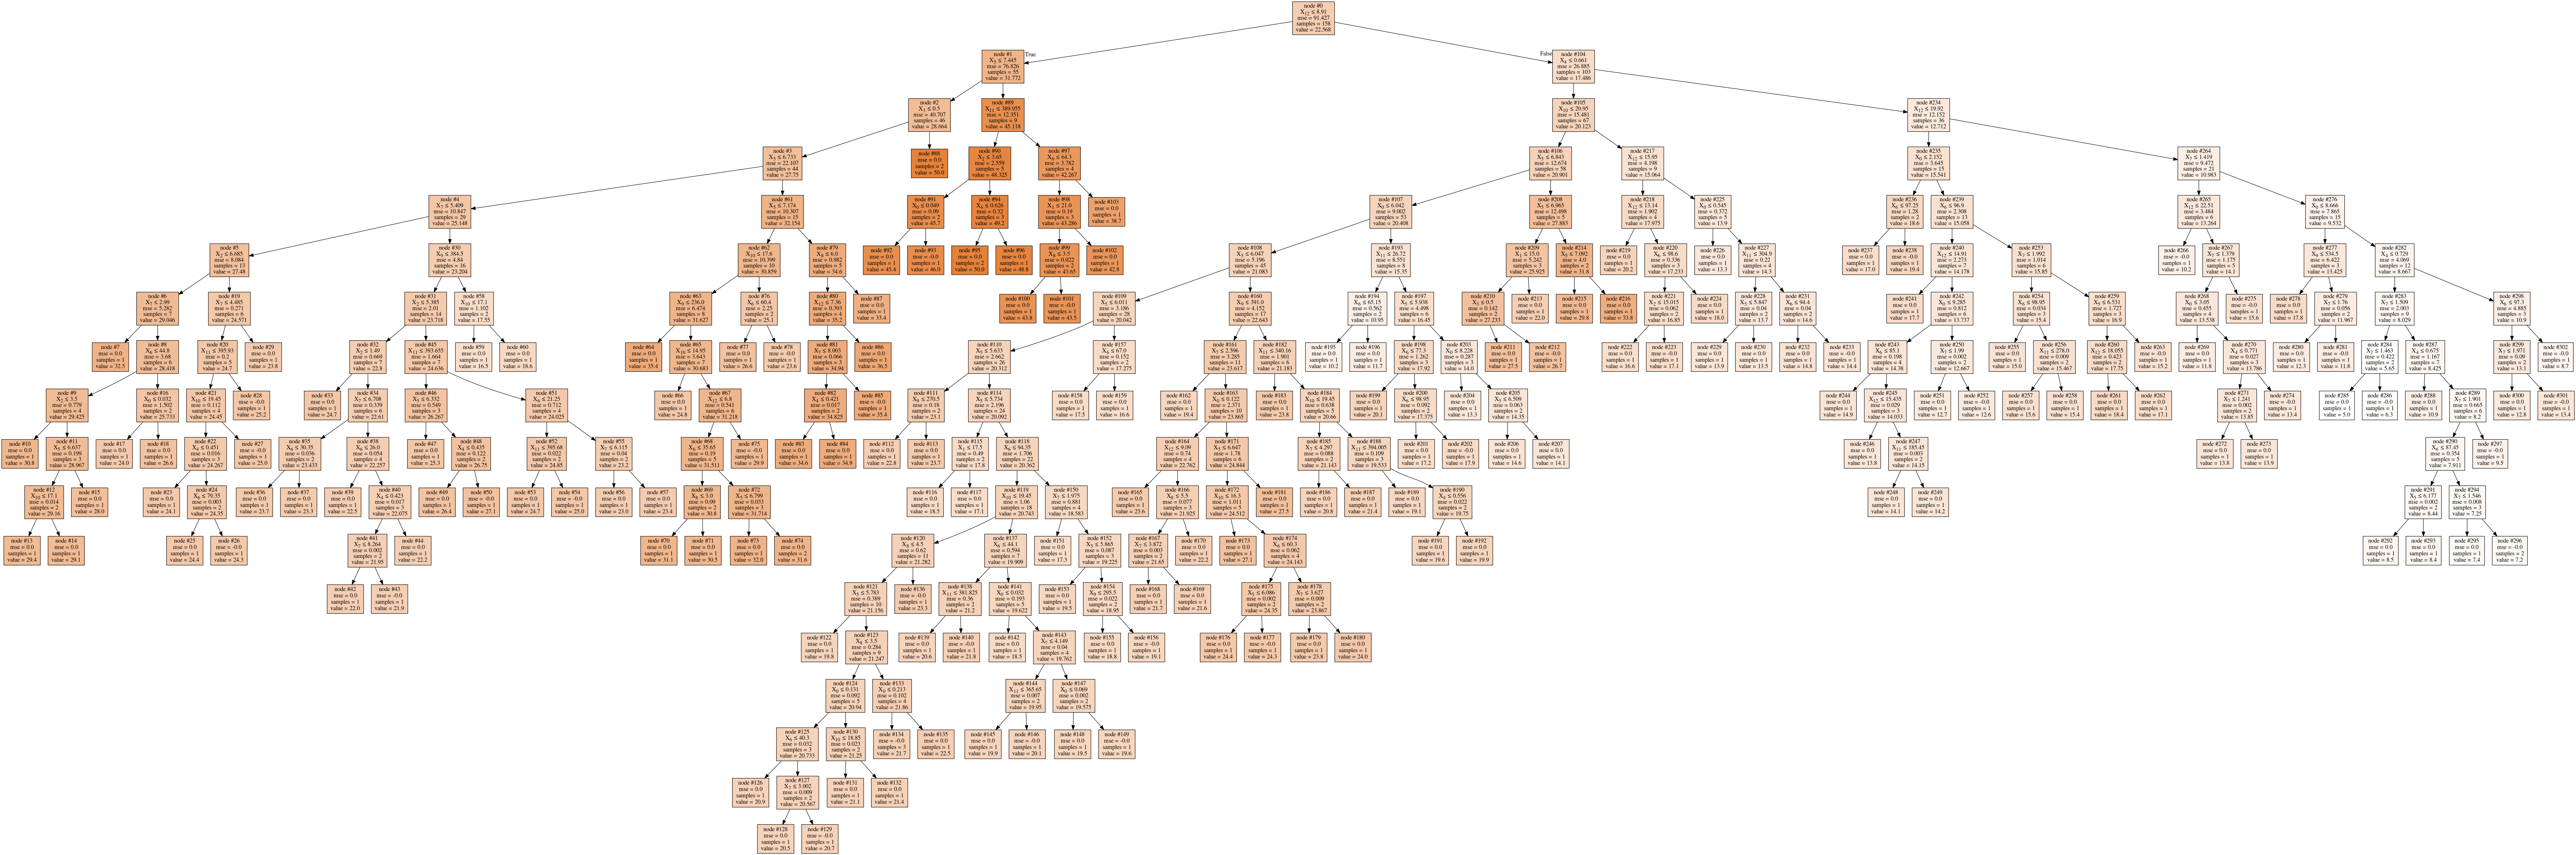

In [8]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [9]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

In [10]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

3256

### Check output against the diagram

In [11]:
#irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

# Run the iRF function

We will run the iRF with the following **parameters**

#### Data:
* breast cancer binary classification data
* **random state (for reproducibility):** 2018

#### Weighted RFs
* **K:** 5 iterations
* **number of trees:** 20

#### Bootstrap RFs
* **proportion of bootstrap samples:** 20%
* **B:** 30 bootstrap samples
* **number of trees (bootstrap RFs):** 5 iterations

#### RITs (on the bootstrap RFs)
* **M:** 20 RITs per forest
* **filter label type:** 1-class only
* **Max Depth:** 5
* **Noisy Split:** False
* **Number of splits at Node:** 2 splits

# Running the iRF is easy - single function call

* All of the bootstrap, RIT complexity is covered through the key parameters passed through
in the main algorithm (as listed above)
* This function call returns the following data:
    1. all RF weights
    2. all the K RFs that are iterated over
    3. all of the B bootstrap RFs that are run
    4. all the B*M RITs that are run on the bootstrap RFs
    5. the stability score
    
### This is a lot of data returned!

Will be useful when we build the **interface** later

### Let's run it!

In [12]:
all_rf_weights, all_K_iter_rf_data, \
all_rf_bootstrap_output, all_rit_bootstrap_output, \
stability_score = irf_utils.run_iRF(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    rf=RandomForestRegressor(),
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=None,
                                    M=20,
                                    max_depth=5,
                                    noisy_split=False,
                                    num_splits=2,)

[0.00378041 0.00378041 0.00312295 0.00328731 0.00328731 0.00361604
 0.00345168 0.00328731 0.00345168 0.00345168 0.00509533 0.00443787
 0.0042735  0.00312295 0.00262985 0.00230112 0.00328731 0.00328731
 0.00328731 0.00328731 0.00164366 0.00246548 0.00147929 0.00082183
 0.00821828 0.00673899 0.00542406 0.00821828 0.00673899 0.00706772
 0.00312295 0.00328731 0.00345168 0.00328731 0.00345168 0.00361604
 0.00394477 0.00378041 0.00361604 0.0047666  0.0042735  0.00443787
 0.00378041 0.00180802 0.00164366 0.00147929 0.00230112 0.00295858
 0.00295858 0.00328731 0.00328731 0.00312295 0.00328731 0.00262985
 0.00246548 0.00394477 0.00328731 0.00345168 0.00345168 0.00328731
 0.00328731 0.00378041 0.00378041 0.00361604 0.00312295 0.00262985
 0.00230112 0.00328731 0.00328731 0.00328731 0.00328731 0.00312295
 0.00180802 0.00180802 0.00082183 0.00328731 0.00246548 0.00279421
 0.00509533 0.0047666  0.00443787 0.0042735  0.0042735  0.00378041
 0.00673899 0.00509533 0.00378041 0.00394477 0.00378041 0.0042

In [13]:
stability_score

{'4_5_6_10_12': 0.03333333333333333,
 '4_5_10_12': 0.16666666666666666,
 '4_5_10': 0.03333333333333333,
 '5_10': 0.06666666666666667,
 '5': 0.9666666666666667,
 '5_12': 1.0,
 '12': 0.9666666666666667,
 '4_5_12': 0.8333333333333334,
 '5_10_12': 0.4666666666666667,
 '0_4_5_10_12': 0.1,
 '0_5_12': 0.9,
 '5_7_12': 0.8666666666666667,
 '0_5_7_10_12': 0.06666666666666667,
 '0_4_5_12': 0.43333333333333335,
 '4_12': 0.5666666666666667,
 '5_7_10_12': 0.1,
 '0_5_6_8_10_11_12': 0.03333333333333333,
 '0_5_10_12': 0.13333333333333333,
 '0_5': 0.3333333333333333,
 '0_5_7': 0.13333333333333333,
 '5_7': 0.43333333333333335,
 '0_7_10_12': 0.03333333333333333,
 '0_5_6_12': 0.2,
 '5_6': 0.1,
 '0_6_12': 0.13333333333333333,
 '0_12': 0.6,
 '5_6_12': 0.5,
 '6_12': 0.36666666666666664,
 '0_4_6_10_12': 0.03333333333333333,
 '4_6_12': 0.06666666666666667,
 '11_12': 0.3,
 '4_11_12': 0.06666666666666667,
 '2_5_12': 0.13333333333333333,
 '2_12': 0.13333333333333333,
 '4_5': 0.3333333333333333,
 '5_6_7_11_12': 0.0

# Examine the stability scores

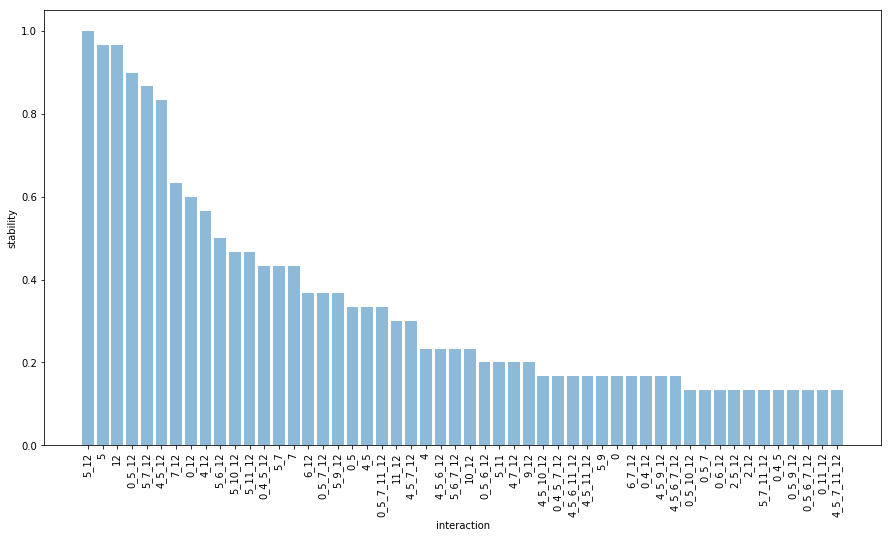

In [14]:
irf_jupyter_utils._get_histogram({key: value for key, value in stability_score.items() if value > 0.1}, sort = True)

That's interesting - feature 22, 27, 20, 23 keep popping up!

We should probably look at the feature importances to understand if there is a useful correlation

# Examine feature importances
In particular, let us see how they change over the K iterations of random forest

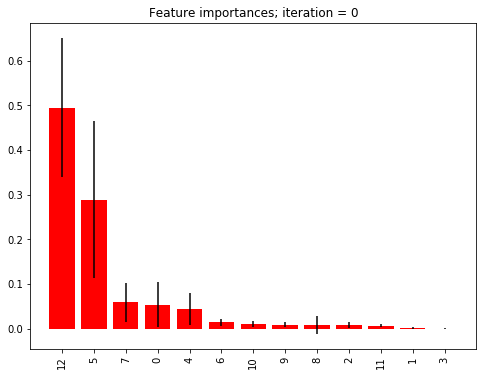

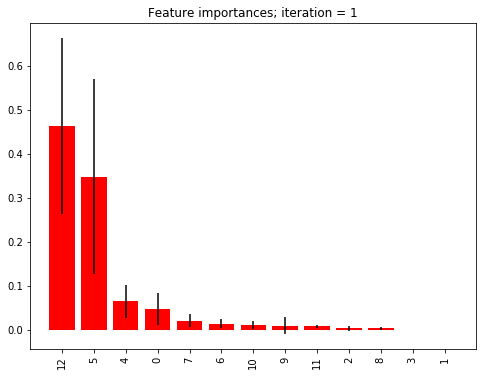

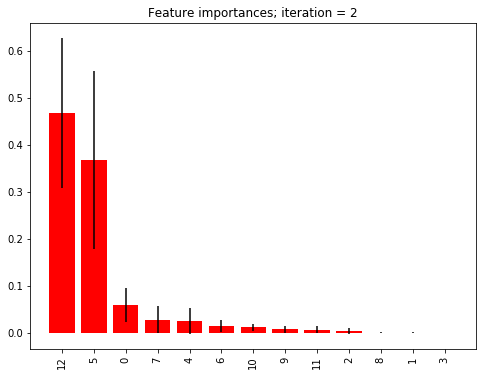

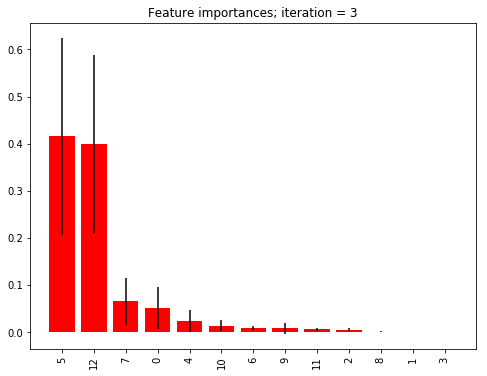

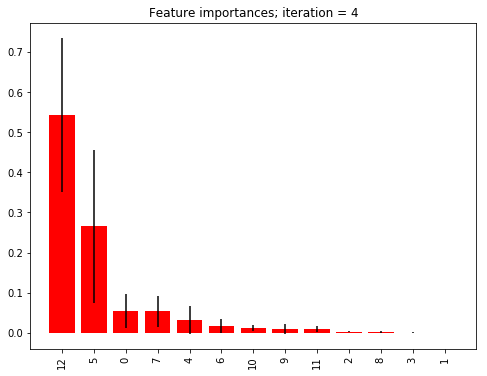

In [15]:
for k in range(5): 
    
    iteration = "rf_iter{}".format(k)
    
    feature_importances_std = all_K_iter_rf_data[iteration]['feature_importances_std']
    feature_importances_rank_idx = all_K_iter_rf_data[iteration]['feature_importances_rank_idx']
    feature_importances = all_K_iter_rf_data[iteration]['feature_importances']

    plt.figure(figsize=(8, 6))
    title = "Feature importances; iteration = {}".format(k)
    plt.title(title)
    plt.bar(range(X_train.shape[1])
            , feature_importances[feature_importances_rank_idx]
            , color="r"
            , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
    plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()   

## Some Observations
* Note that after 5 iterations, the most important features were found to be 12, 5, 0, 7.
* Now also recall that the most stable interactions were found to be '5_12', '0_5_12', '5_7_12', '4_5_12'
* Given the overlap between these two plots, the results are not unreasonable here. 

# Explore iRF Data Further

## We can look at the decision paths of the Kth RF

Let's look at the final iteration RF - the key validation metrics

In [16]:
irf_jupyter_utils.pretty_print_dict(all_K_iter_rf_data['rf_iter4']['rf_validation_metrics'])

{'mae_loss': 1.7899999999999991, 'mse_loss': 12.890367193675885}


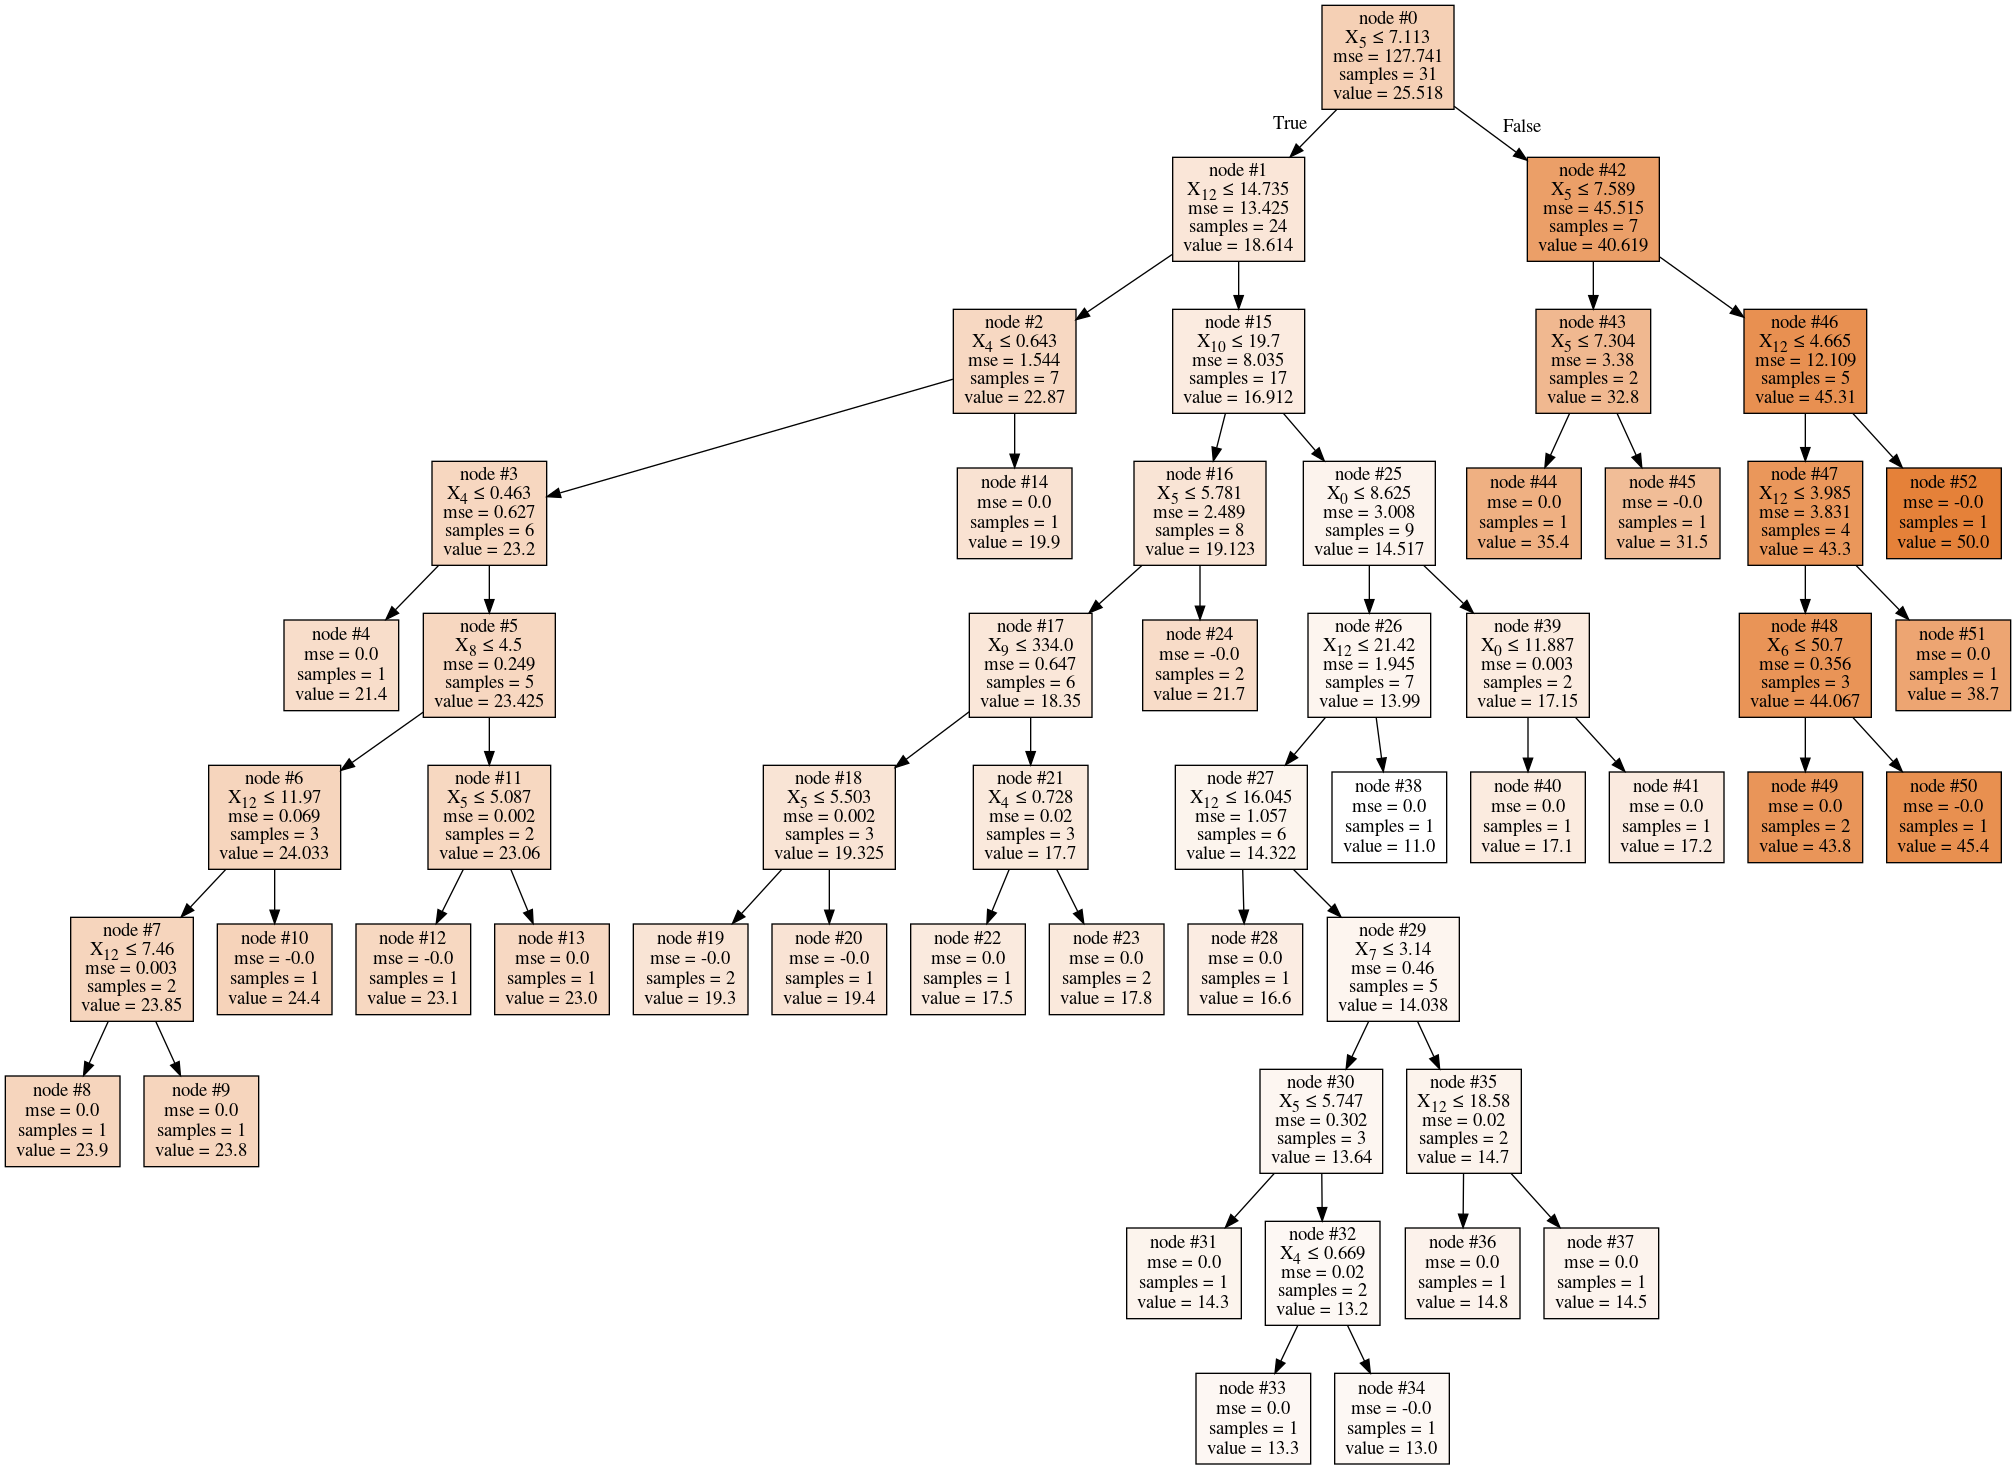

In [17]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_K_iter_rf_data['rf_iter4']['rf_obj'].estimators_[0])

### We can get this data quite easily in a convenient format

In [18]:
irf_jupyter_utils.pretty_print_dict(
    all_K_iter_rf_data['rf_iter4']['dtree0']['all_leaf_paths_features'])

[   array([12,  5,  0,  5,  5, 10, 12, 12, 10]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 10]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11,  9,  5]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11,  9,  5]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11,  9, 12]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11,  9, 12, 12]),
    array([12,  5,  0,  5,  5, 10, 12, 12, 11,  9, 12, 12]),
    array([12,  5,  0,  5,  5, 10, 12]),
    array([12,  5,  0,  5,  5, 10, 12]),
    array([12,  5,  0,  5,  5, 10, 12,  5,  7]),
    array([12,  5,  0,  5,  5, 10, 12,  5,  7]),
    array([12,  5,  0,  5,  5, 10, 12,  5]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5,  5]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5,  5]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5, 12]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5, 12]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5, 12]),
    array([12,  5,  0,  5,  5,  6,  6, 10,  5, 12]),
    array([12,  5

This checks nicely against the plotted diagram above.

In fact - we can go further and plot some interesting data from the Decision Trees
- This can help us understand variable interactions better

In [19]:
irf_jupyter_utils.pretty_print_dict(
    all_K_iter_rf_data['rf_iter4']['dtree0']['all_leaf_node_values'])

[   array([[22]]),
    array([[23]]),
    array([[27]]),
    array([[25]]),
    array([[25]]),
    array([[24]]),
    array([[24]]),
    array([[24]]),
    array([[29]]),
    array([[20]]),
    array([[23]]),
    array([[23]]),
    array([[22]]),
    array([[29]]),
    array([[29]]),
    array([[30]]),
    array([[31]]),
    array([[28]]),
    array([[28]]),
    array([[26]]),
    array([[35]]),
    array([[32]]),
    array([[26]]),
    array([[24]]),
    array([[23]]),
    array([[24]]),
    array([[26]]),
    array([[32]]),
    array([[29]]),
    array([[33]]),
    array([[32]]),
    array([[31]]),
    array([[34]]),
    array([[33]]),
    array([[36]]),
    array([[33]]),
    array([[37]]),
    array([[36]]),
    array([[23]]),
    array([[50]]),
    array([[50]]),
    array([[37]]),
    array([[38]]),
    array([[41]]),
    array([[42]]),
    array([[48]]),
    array([[50]]),
    array([[19]]),
    array([[18]]),
    array([[18]]),
    array([[20]]),
    array([[20]]),
    array([[

## We can also look at the frequency that a feature appears along a decision path

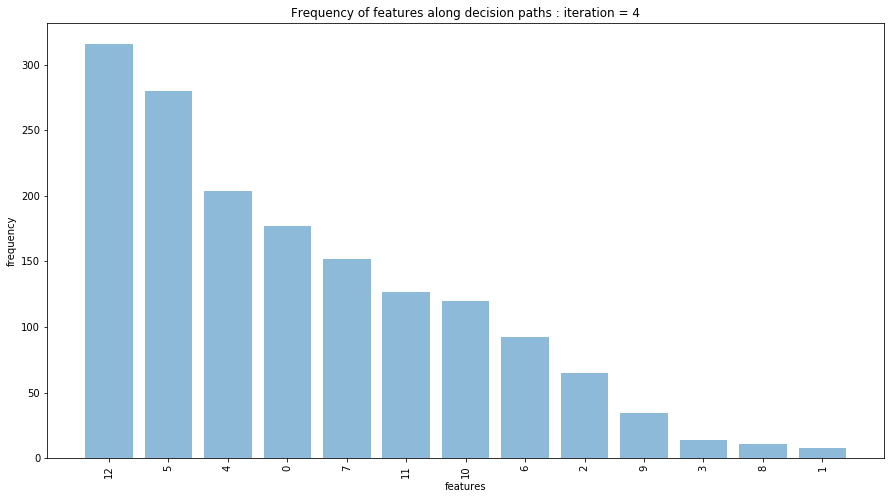

In [20]:
irf_jupyter_utils._hist_features(all_K_iter_rf_data['rf_iter4'], n_estimators = 2, \
                         title = 'Frequency of features along decision paths : iteration = 4')

The most common features that appeared were 27,22,23, and 7. This matches well with the feature importance plot above. 

# Run some Sanity Checks

## Run iRF for just 1 iteration - should be the uniform sampling version

This is just a sanity check: the feature importances from iRF after 1 iteration should match the feature importance from running a standard RF

In [21]:
all_K_iter_rf_data.keys()
print(all_K_iter_rf_data['rf_iter0']['feature_importances'])

[5.41042089e-02 1.12769929e-03 7.90596680e-03 3.22434787e-04
 4.48608520e-02 2.89110738e-01 1.40953468e-02 5.93153887e-02
 7.97781001e-03 9.43674539e-03 9.94142690e-03 6.91524422e-03
 4.94886138e-01]


Compare to the original single fitted random forest

In [22]:
rf = RandomForestRegressor(n_estimators=20, random_state=2018)
rf.fit(X=X_train, y=y_train)
print(rf.feature_importances_)

[5.05845179e-02 1.26970530e-03 6.08126095e-03 3.45598375e-04
 5.59065675e-02 3.15501437e-01 1.69053594e-02 3.87702570e-02
 6.63571111e-03 1.30865713e-02 1.11840449e-02 8.04202169e-03
 4.75686948e-01]


And they match perfectly as expected. 

## End Wrapper test